# Executable Papers

In [4]:
import spacy
from spacy import displacy
import sys
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


## DISPLACY

In [8]:
from spacy import displacy

text = open("./data/2_dutronc_noise")
#text = open("./data_dutron_txt/0_dutronc_clean")
text_lire = text.read()
text.close()
ner_model1 = spacy.load("fr_core_news_md")
doc1 =  ner_model1(text_lire)
displacy.serve(doc1,style="ent")

/home/antonomaz/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Compter nombre entités nommées spatiales par ligne

In [5]:
def nombre_eng_ligne(tab_L_data):
    list_result = [[]]
    compt=0
    compt1=0
    # list_result[compt].append(tab_L_data[0][0])
    # list_result[compt].append("nombre d'entité nommée")
    # list_result[compt].append(tab_L_data[0][2])
    # list_result[compt].append("nombre d'entité nommée")
    for ligne in tab_L_data:
        if compt1 == 0:
            compt1=compt1+1
            continue
        list_result.append([])
        list_result[compt].append(ligne[1])
        list_result[compt].append(len(ligne[1]))
        list_result[compt].append(ligne[3])
        list_result[compt].append(len(ligne[3]))
        ##Pour tableau représentation
        # list_result.append([])
        # list_result[compt].append(str(ligne[1]))
        # list_result[compt].append(str(len(ligne[1])))
        # list_result[compt].append(str(ligne[3]))
        # list_result[compt].append(str(len(ligne[3])))
        compt=compt+1
    return (list_result)

## Comparer les EN-G pour définir les VP, FP et FN

In [6]:
def compare_eng(tab_resultat):
    count_ligne=0
    VP, FP, FN, AUTRE = [], [], [], []
    for ligne in tab_resultat:
        if len(ligne) == 0:
            continue
        taillemin =  min(ligne[1], ligne[3])
        #print(count_ligne)
        count_ligne=count_ligne+1
        if taillemin == 0:
            if count_ligne == (len(tab_resultat)-1):
                break
            else:
                continue
        for i in range (0, taillemin):
            a=ligne[0][i]
            b= ligne[2][i]
            if str(a) == str(b) :
                VP.append(b)
            else:
                if len(str(b)) == 1 or len(str(a))==1 :
                    #https://fr.wikipedia.org/wiki/Liste_de_toponymes_courts#Une_lettre
                    AUTRE.append(b)
                else:
                    carac_1_a,carac_2_a,carac_3_a = str(a)[0],str(a)[1],str(a)[-1]
                    #print("carac_1_a,carac_2_a,carac_3_a",carac_1_a,carac_2_a,carac_3_a)
                    carac_1_b,carac_2_b,carac_3_b = str(b)[0],str(b)[1],str(b)[-1]
                    #print("carac_1_b,carac_2_b,carac_3_b",carac_1_b,carac_2_b,carac_3_b)
                    if carac_1_a == carac_1_b and carac_2_a == carac_2_b and carac_3_a == carac_3_b:
                        FN.append(b)
                    else:
                        FP.append(b)    
    return(VP,FP,FN,AUTRE)
                

## MAIN
#### Il faudrait reprendre le code pour répertorier toutes les EN puis discriminer les EN-G des autres. Ceci permettra de repérer lorsque'un modèle attribu un label autre que "LOC" à un lieu.

./data/data_aimard/Aimard_txt_ocr_alignement.txt
./data/data_aimard/Aimard_txt_propre_alignement.txt
enty Apacheria
<class 'spacy.tokens.span.Span'>
<class 'list'>
<class 'list'>
result_VP
[Indiens, Indiens, Mexicains]
result_FP
[Prologue, Espagnols, Incas, États, État, État , sierra Madre, golfe de Californie, terre, Apaches, Pacifique, Cerro de la campana -- Montagne, rue du Rosaire, tourbillon, cris, Ciboto, garde, Pérou, citernes, hacienda del Milagro, oreiller, Panama, loyauté, épais, hacienda del Milagro, marier, scintiller, pasto, hacienda, Eusébio, l'assassin, aigle, Eusébio, le soleil, forêt vierge, muette, avez, tache, Eusébio, Eusébio, Eusébio, Canadienne, Indiens, Blanc, nerveux, hanches, exercice, Indiens, sais, Belhumeur, soleil, piste des Comanches, soleil, Arkansas, Indiens, Tête, Arkansas, Comanches , Indiens, aigle, Indien, Comanches, réfléchir, Comanches, Vert-de-gris, Indiens, Canadien, Belhumeur, sais, Belhumeur, terre, Châteaux Blancs, Belhumeur, piste des Comanch

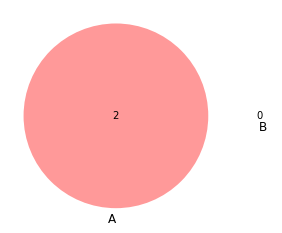

<class 'spacy.tokens.span.Span'>
precision 0.783289817232376
rappel 100.0
F_mesure 1.5544041450777204
106.40457010269165
./data/data_aimard/Aimard_txt_ocr_alignement.txt
./data/data_aimard/Aimard_txt_propre_alignement.txt
enty Apacheria
<class 'spacy.tokens.span.Span'>
<class 'list'>
<class 'list'>
result_VP
[Indiens, Indiens, Indiens, Mexicains]
result_FP
[Espagnols, Incas, l'Amérique, État , sierra Madre, Pacifique, incurie, Hermosillo, tumulte, Cerro, vaquero, lepero, lepero, galop, nopals, citernes, tapia, adoves, Panama, hacienda del Milagro, Abandonnera, bruni, désert , hanches, buffalos, Indiens, Indiens, Mocksens, soleil, soleil, Arkansas, Indiens, Comanches, Comanches , Indiens, Canadien, Canadien, Tête, Indiens, Comanches, La Tête-d'Aigle, Comanches, Vert-de-gris, terre, galerie, Indien, Canadien, Indien, Comanches, gambusinos demi-sang, neiges du Chimborazo, Jupiter, Américaines, statue, Linnée, Indiens, mescal, soleil, gambusinos, terre, Indiens, Indiens, Indien, Comanches,

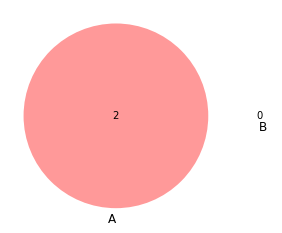

<class 'spacy.tokens.span.Span'>
precision 1.6666666666666667
rappel 100.0
F_mesure 3.278688524590164
218.99043345451355
./data/data_aimard/Aimard_txt_ocr_alignement.txt
./data/data_aimard/Aimard_txt_propre_alignement.txt
enty Apacheria
<class 'spacy.tokens.span.Span'>
<class 'list'>
<class 'list'>
result_VP
[Indiens, Indiens, Mexicains]
result_FP
[l'Amérique, Espagnols, Incas, l'Amérique, escopettes, États, État de Sonora, rio Gila, État , sierra Madre, Pacifique, rio Gila, Raousset, ciudad, pisé, Indiens, Cerro, Lassez, Rends, juez de letras, juez de letras, lepero, Hermosillo, Pérou, nopals, Panama, Le soleil, jardin des Oliviers, juez de letras, désert , Indien, Canadienne, rivière Rouge, Indiens Lune, hanches, daim, buffalos, Indiens, Indiens, soleil, soleil, Arkansas, Indiens, Blancs, La Tête, cher, suis, Canadien, Canadien, Indiens, Peaux, Indiens, terre, Châteaux Blancs, États-Unis, galerie, guet, Canadien, Indien, piste des Comanches, gambusinos, Chimborazo, Américaines, Babil

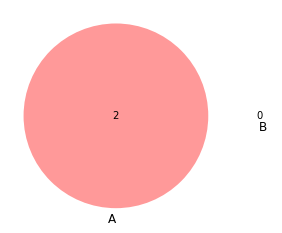

<class 'spacy.tokens.span.Span'>
precision 1.1406844106463878
rappel 100.0
F_mesure 2.255639097744361
333.71271085739136


In [18]:
start_time=time.time()
precision_liste=[]
rappel_liste=[]
f_mesure_liste=[]

##model_langue()
liste_model_lang =[]
liste_model_lang.append("fr_core_news_sm")
liste_model_lang.append('fr_core_news_lg')
liste_model_lang.append('fr_core_news_md')


Liste_VP=[]
Liste_FN=[]



for model in liste_model_lang:
    ner_model = spacy.load(model)
    
    L = [[]]
    #for num_path, path in enumerate(sorted(globlis.glob("data_dutron_txt/*"))):
    for num_path, path in enumerate(sorted(glob.glob("./data/data_aimard/*"))):
      print(path)
      L[0].append(path)
      L[0].append("ents")
      f = open(path)
      lignes = f.readlines()
      f.close()
      for cpt, l in enumerate(lignes):
        if (cpt+1)==len(L):
          L.append([])
        doc = ner_model(l)
        L[cpt+1].append(l)
        #print(doc.ents)
        if doc.ents == ():
            ent = doc.ents
            # ent = str(doc.ents)# tableau Html
        else:
            listeent=[]
            # ent=str()# tableau Html
            ent=()
            for enty in doc.ents:
                if enty.label_=="LOC":#recupérer que les LOC
                    listeent.append(enty)
                # else:
                #     listeent.append(enty.label_)
                #     listeent.append(enty.text)
            
            ent=tuple(listeent)
            #ent=str(tuple(listeent))# tableau Html
       
        L[cpt+1].append(ent)
        #L[cpt+1].append(doc.ents)


    result_tab=nombre_eng_ligne(L)
    #print(result_tab)

    result_VP,result_FP,result_FN,result_AUTRE=compare_eng(result_tab)
    print("enty",enty)
    print(type(enty))
    print(type(result_VP))
    print(type(Liste_VP))
    print("result_VP")
    print(result_VP)
    print("result_FP")
    print(result_FP)
    print("result_FN")
    print(result_FN)
    print("result_AUTRE")
    print(result_AUTRE)
    for enty in result_VP:
        Liste_VP.append(enty.text)
    print(type(enty.text))
    print("Liste VP",Liste_VP)   
    
    
    for enty in result_FN:
        Liste_FN.append(enty.text)
        #Liste_FN.split()
    #print("Liste FN", Liste_FN)
    #print("enty",type(enty))
    
    venn2([set(Liste_VP), set(Liste_FN)])
    
    plt.show()
    
    print(type(result_VP[0]))
    

    VP = len(result_VP)
    FP = len(result_FP)
    FN = len(result_FN)
    precision = 100*VP/(VP+FP)
    rappel = 100*VP/(VP+FN)
    f_mesure = (2*precision*rappel)/(precision+rappel)
    
   
    precision_liste.append(precision)
    rappel_liste.append(rappel)
    f_mesure_liste.append(f_mesure)
    
    print("precision",precision)
    print("rappel",rappel)
    print("F_mesure",f_mesure)



    interval = time.time() - start_time 
    
    print(interval)
    
    #print(doc)
    #print(doc.ents)

#A intégrer mieux
# tableau Html
#s = "<table border = '1'>\n"
#for ligne in L:
#   s+="<tr><td>%s</td></tr>\n"%("</td> <td>".join(ligne))
#s+="</table>"
#w = open("output_reslta_cpt_eng_loc.html", "w")
#w.write(s)
#w.close()
# -
   
   

## VISUALISATION

### Tableau

In [9]:
tab = pd.DataFrame({"Precision":[precision_liste[0],precision_liste[1],precision_liste[2]],"Recall":[rappel_liste[0],rappel_liste[1] ,rappel_liste[2] ],"F-Mesure":[f_mesure_liste[0] ,f_mesure_liste[1] ,f_mesure_liste[2] ]},index = [liste_model_lang[0] ,liste_model_lang[1] , liste_model_lang[2] ])
tab

,Precision,Recall,F-Mesure
fr_core_news_sm,94.736842,85.714286,90.000000
fr_core_news_lg,94.736842,90.000000,92.307692
fr_core_news_md,94.736842,90.000000,92.307692


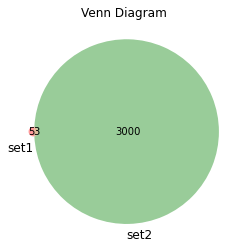

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

sets = Counter()
sets["01"] = 3000
sets["11"] = 3
sets["10"]  = 5
setLabels = ["set1", "set2"]

plt.figure()
ax = plt.gca()
v = venn2(subsets = sets, set_labels = setLabels, ax = ax)
plt.title("Venn Diagram")
plt.show()

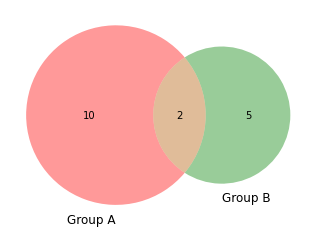

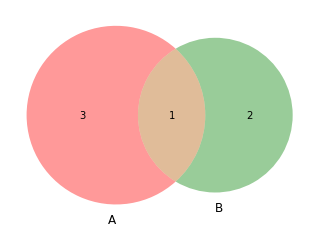

In [5]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()
 
# Second way
venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])
plt.show()
